In [2]:
#öncelikle datayı alıp analiz edelim. Bunun için ihtiyaç duyacağımız kütüphaneleri import edelim.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
data = pd.read_csv("marketing.csv")
datayedek = data.copy() #datamın yedeğini de aldım.
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [9]:
data.info() #görüldüğü üzere 9 tane kategorik değiken , 5 tane denumerik değişken var

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


Şimdi
yes/no colonlarını da boolen türünde evet =1,hayır = 0 olarak kullanılcaktır.

## BENDEN İSTENEN SONUCU 1 veya 0 OLARAK RAPORLAYACAĞIM.

# Öznitellikler:

yaş: müşterinin yaşı (sayısal)

iş: iş türü (kategorik) =12değişken

medeni durum: medeni durum (kategorik) =3 değişken

eğitim (kategorik) =4 değişken

varsayılan: temerrüde düşen kredi var mı? (ikili)

bakiye: avro cinsinden ortalama yıllık bakiye (sayısal)

konut: konut kredisi var mı? (ikili)

kredi: kişisel kredi var mı? (ikili)

iletişim: iletişim iletişim türü (kategorik) 3 degişken

gün: ayın son iletişim günü (sayısal)

ay: yılın son iletişim ayı (kategorik) 11 değişen

süre: saniye cinsinden son temas süresi (sayısal)

kampanya: bu kampanya sırasında ve bu müşteri için gerçekleştirilen kişi sayısı (sayısal, son iletişimi içerir)

Çıktı (istenen hedef):

y - müşteri vadeli mevduata abone oldu mu? (ikili)


In [4]:
#Şimdi data da ki numerik deşikenleri incleyelim.
num_df = data.select_dtypes(include =["float64","int64"])

In [6]:
num_df.head()

,age,balance,day,duration,campaign
0,58,2143,5,261,1
1,44,29,5,151,1
2,33,2,5,76,1
3,47,1506,5,92,1
4,33,1,5,198,1


In [8]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,40000.0,40.544600,9.641776,19.0,33.0,39.0,48.0,95.0
balance,40000.0,1274.277550,2903.769716,-8019.0,54.0,407.0,1319.0,102127.0
day,40000.0,16.017225,8.278127,1.0,8.0,17.0,21.0,31.0
duration,40000.0,254.824300,259.366498,0.0,100.0,175.0,313.0,4918.0
campaign,40000.0,2.882175,3.239051,1.0,1.0,2.0,3.0,63.0


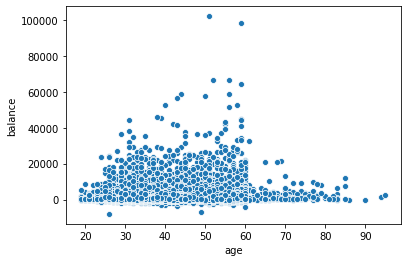

In [12]:
sbn.scatterplot(x="age",y="balance", data=data);

Burada müşterilerin yaşı ile banka hesaplarındaki bakiyelerin arasında nasıl bir ilişki var. 
Yorumlaya biliriz. Burada 30-60 yaş aralığında müşterilerin banka hesapalrında daha fazla bakiye oldugu görebiliriz.
Detaylı grafik yorumunu tabiki size bırakıyorum.

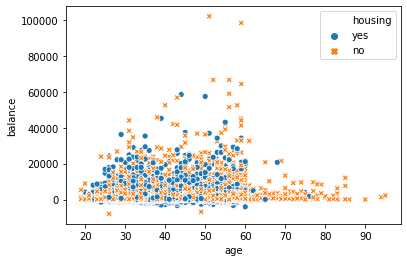

In [17]:
sbn.scatterplot(x="age",y="balance",hue="housing",style="housing", data=data);

Bu grafikte ise şu yorumu yapmak dogru olur. 
ev  kredisi olmayan 60-80 yaş aralığındaki müşterilerin hesaplarında 20000 altında ve 0 ın üzerinde bakiye olduğu görebilriz.